1) Importer les libraries nécessaire

In [111]:

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing  
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
sns.set_context('paper')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

2) importer le fichier CSV

In [341]:
train=pd.read_csv("Dataset_3_sales.csv", sep="|")
#train.describe()
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,index,...,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0.0,0,...,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,1,1,1,1,1,1,1,1.0,1,...,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,2,2,2,2,2,2,2,2.0,2,...,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,3,3,3,3,3,3,3,3.0,3,...,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,4,4,4,4,4,4,55555555555,4.0,4,...,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


3) suppression des colonnes inutiles et convertir au format correct

In [342]:
#train.dtypes
#supression des colonnes
train.drop(train.iloc[:,0:10],1,inplace=True)
train






,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [343]:
#convestion de la colonne Item_Weight en float
Item_Weight = train["Item_Weight"]
Item_Weight = pd.to_numeric(Item_Weight, errors="coerce")
train["Item_Weight"] = Item_Weight

4) Afficher le type des colonnes

In [344]:
#Affiche le type des colonnes
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

5) Un tableau crosser entre Outlet_Type et Outlet_Size pour comprendre la taille de la boutique en fonction du type de boutique car on sait que les taille des points de vente dépend du type de point de vente et de son emplacement

In [345]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [145]:
train.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [346]:
dic = {'Grocery Store':'Small'}
s = train.Outlet_Type.map(dic)

In [347]:
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     4905
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

6) verification des valeurs manquantes

In [348]:

train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  2449
Item_Fat_Content               50
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3091
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [349]:
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

#dic = {"Tier 2":"Small"}
#s = train.Outlet_Location_Type.map(dic)
#train.Outlet_Size = train.Outlet_Size.combine_first(s)

train.isnull().sum()
train.Item_Fat_Content.value_counts()

Low Fat    8443
Regular    4803
LF          521
reg         195
low fat     177
None         15
Name: Item_Fat_Content, dtype: int64

7) Recodage des variables

In [350]:
def pe(x):
    if x=='LF':
        return 'Low Fat'
    elif x=='reg' or x=='Regular':
        return 'Regular'
    elif x=='low fat' or x=='Low Fat' or x== '':
        return 'Low Fat'
    
train["Item_Fat_Content"] = train["Item_Fat_Content"].map(pe)

#où

#train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
#train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

8) verification des données manquantes

In [330]:

train.Item_Fat_Content.value_counts()
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content               65
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   925
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [351]:
#
dic = {"Tier 2":"Small"}
s = train.Outlet_Location_Type.map(dic)
train.Outlet_Size = train.Outlet_Size.combine_first(s)

column_with_nan=train.columns[train.isnull().any()]
for column in column_with_nan:
    print(column,train[column].isnull().sum())
train.isnull().sum(axis=0)

Item_Fat_Content 65
Item_Outlet_Sales 5681


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content               65
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

4) verification des données manquantes

In [353]:
sales.isna().sum()

#où affiche uniquement les colonnes avec le nombre de données manquantes

column_with_nan=sales.columns[train.isnull().any()]
for column in column_with_nan:
    print(column,train[column].isnull().sum())

Item_Fat_Content 65
Item_Outlet_Sales 5681


In [354]:
train.Item_Fat_Content.value_counts()

Low Fat    9141
Regular    4998
Name: Item_Fat_Content, dtype: int64

In [355]:
#Comme "Item_Weight" est une variable continue, on va utiliser la moyenne(ou median, mode) pour remplir les valeurs manquantes.

#sales['Item_Weight']=sales['Item_Weight'].fillna(sales['Item_Weight'].mean())
train=train.dropna()
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

5) gestion des données manquantes

6) Recodage des variables

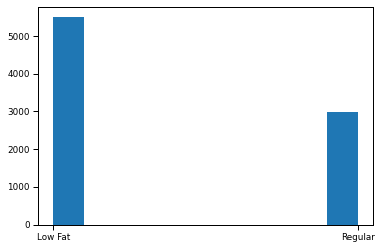

In [356]:
plt.hist(train.Item_Fat_Content)
plt.show()

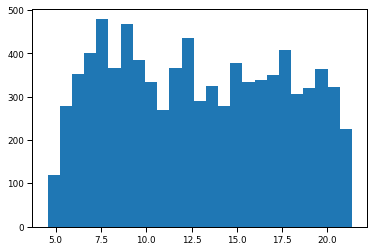

In [357]:
plt.hist(train.Item_Weight,25)
plt.show()

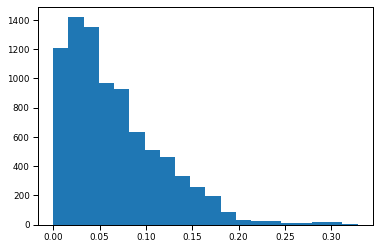

In [358]:
plt.hist(train.Item_Visibility,20)
plt.show()

In [360]:
# Remplacer les 'O' avec NaN

train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

# Remplacer les NaN. par la moyenne de la colonne "Item_Visibility"

train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


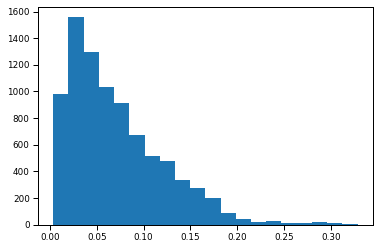

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [361]:
plt.hist(train.Item_Visibility,20)
plt.show()
train.head()

In [364]:
non_numerical_features = train.select_dtypes(include=[np.object])
numerical_features = train.select_dtypes(include=[np.float64])
corrmat=train.corr()
corrmat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.021095,0.027952,-0.011699,0.013765
Item_Visibility,-0.021095,1.000000,-0.005560,-0.074793,-0.125121
Item_MRP,0.027952,-0.005560,1.000000,0.005623,0.567523
Outlet_Establishment_Year,-0.011699,-0.074793,0.005623,1.000000,-0.048422
Item_Outlet_Sales,0.013765,-0.125121,0.567523,-0.048422,1.000000


In [365]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [366]:
#Convertir en numeric

var_cat = var_cat.columns.tolist()
var_cat = ['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

var_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [367]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

<ipython-input-367-2ba594d6aeef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i] = le.fit_transform(train[i])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,0,2,1,994.7052


In [368]:
le = LabelEncoder()

In [369]:
# LA matrice de correlation

corrmat = train.corr()
corrmat

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.026920,-0.021095,0.036320,0.027952,-0.011699,-0.012017,0.003697,-0.000179,0.013765
Item_Fat_Content,-0.026920,1.000000,0.052707,-0.139365,0.005765,0.002850,-0.001154,-0.002031,0.003292,0.018724
Item_Visibility,-0.021095,0.052707,1.000000,-0.042448,-0.005560,-0.074793,0.090703,-0.032515,-0.170901,-0.125121
Item_Type,0.036320,-0.139365,-0.042448,1.000000,0.032023,0.004895,-0.000549,0.003609,0.003777,0.016902
Item_MRP,0.027952,0.005765,-0.005560,0.032023,1.000000,0.005623,0.001070,0.000721,-0.001293,0.567523
Outlet_Establishment_Year,-0.011699,0.002850,-0.074793,0.004895,0.005623,1.000000,0.424954,-0.088745,-0.121573,-0.048422
Outlet_Size,-0.012017,-0.001154,0.090703,-0.000549,0.001070,0.424954,1.000000,-0.480860,-0.401159,-0.162123
Outlet_Location_Type,0.003697,-0.002031,-0.032515,0.003609,0.000721,-0.088745,-0.480860,1.000000,0.468019,0.090462
Outlet_Type,-0.000179,0.003292,-0.170901,0.003777,-0.001293,-0.121573,-0.401159,0.468019,1.000000,0.401439
Item_Outlet_Sales,0.013765,0.018724,-0.125121,0.016902,0.567523,-0.048422,-0.162123,0.090462,0.401439,1.000000


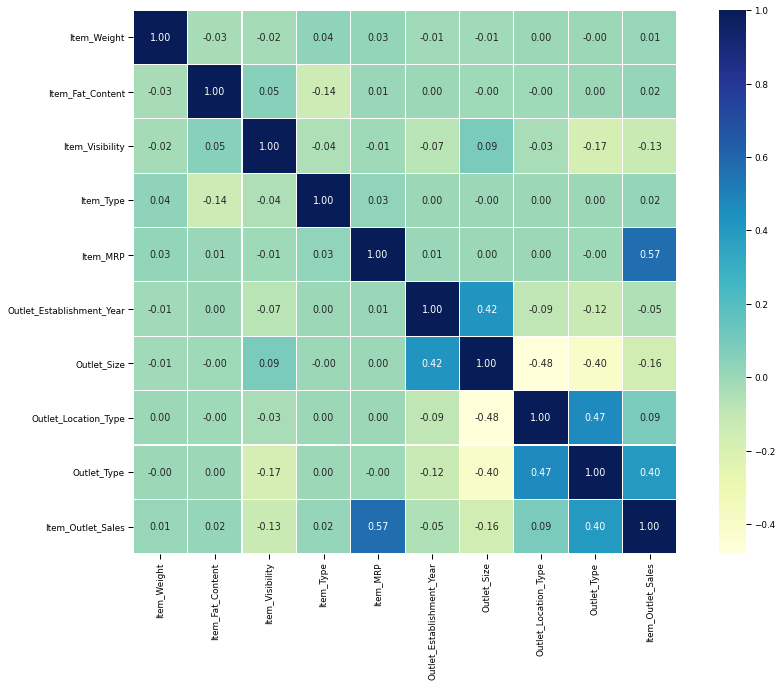

In [275]:
# LA matrice de correlation

f,ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat,annot=True,ax=ax,cmap="YlGnBu",linewidths=0.1,fmt=".2f",square=True)
plt.show()

Choisir les colonnes qui servirons à la prediction

In [276]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Weight']

In [277]:
seed = 240
np.random.seed(seed)

Séparer les variables qui servirons à la prediction de la variable à prédire

In [278]:
X = train[predictors]
y = train.Item_Outlet_Sales

In [279]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight
0,0,0.016047,4,249.8092,1999,1,0,1,9.30
1,1,0.019278,14,48.2692,2009,1,2,2,5.92
2,0,0.016760,10,141.6180,1999,1,0,1,17.50
3,1,0.022911,6,182.0950,1998,2,2,0,19.20
4,0,0.016164,9,53.8614,1987,0,2,1,8.93


In [280]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

Séparer les echantillons de test et d'apprentissage de facon aléotoire

In [286]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [290]:
X_train.shape

(6366, 9)

In [289]:
y_train.shape


(6366,)

In [291]:
X_test.shape

(2123, 9)

Modele de régression linéaire

In [284]:
lm = LinearRegression()

In [292]:
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
predictions[:5]

array([-239.99039147, 1806.79208943, 2398.36300244, 1666.37827639,
        994.69879833])

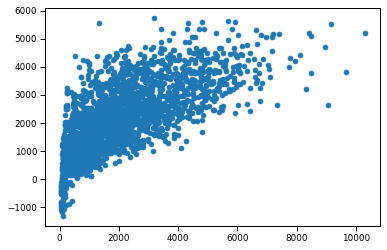

In [293]:
plt.scatter(y_test,predictions)
plt.show()

In [370]:
print("Linear Regression Model Score:",model.score(X_test,y_test))

Linear Regression Model Score: 0.4868387424649093


 Arbre de décision

In [371]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [372]:
predictions = regressor.predict(X_test)
predictions[:5]

array([  73.238 , 1845.5976,  520.6556, 1366.2216, 1378.206 ])

In [373]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
1913,40.6138,73.2380
5666,2966.1390,1845.5976
5759,784.9782,520.6556
8478,4820.3920,1366.2216
363,659.1420,1378.2060


RandomForest

In [375]:
rf = RandomForestRegressor(random_state=43)

In [376]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=43)

In [302]:
predictions = rf.predict(X_test)
predictions[:5]

array([  84.39015 , 2162.025708,  642.703398, 2054.978384,  869.747856])

In [377]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
rmse

1527.5340150269994

In [378]:
print(metrics.r2_score(y_test,predictions))

0.14455149464056294


In [381]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
1913,40.6138,73.2380
5666,2966.1390,1845.5976
5759,784.9782,520.6556
8478,4820.3920,1366.2216
363,659.1420,1378.2060
